### Try 1 - catboost

In [4]:
from catboost import CatBoostRegressor,  Pool, cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def vizualize_submit(train, submit):
    matrix = np.zeros(shape=(30, 46), dtype=np.float64) 
    for x in range(201, 247):
        for y in range(901, 931):
            try:
                sub_df = submit[submit['X'] == x]
                val = sub_df[sub_df['Y'] == y]['NTG'].values[0]
            except:
                sub_df = train[train['X'] == x]
                val = sub_df[sub_df['Y'] == y]['NTG'].values[0]
            matrix[y-931][x-201]=val
    return matrix

def plot_image(array, title=''):
    fig, axes = plt.subplots(figsize=(10,8))
    plt.imshow(array, cmap='Blues')
    plt.title(title)
    CS = plt.contour(np.flipud(array))
    plt.clabel(CS, inline=1,
           fmt='%1.1f',
           fontsize=14)
    fig.tight_layout()
    return axes

In [23]:
df = pd.read_csv("data/Training_wells.csv")
submit_df = pd.read_csv("data/Empty_part.csv")
df.head()

Well    X    Y     NTG
0  201-907  201  907  0.2006
1  201-914  201  914  0.3624
2  201-924  201  924  0.4381
3  202-922  202  922  0.4289
4  202-925  202  925  0.4021

In [24]:
df.describe()

X           Y         NTG
count  138.000000  138.000000  138.000000
mean   223.195652  916.630435    0.325720
std     13.590926    8.765456    0.072432
min    201.000000  901.000000    0.177000
25%    211.000000  909.000000    0.270175
50%    222.500000  917.000000    0.325900
75%    236.500000  924.000000    0.377475
max    246.000000  930.000000    0.562500

/home/gosha20777/anaconda3/envs/ya-profi/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


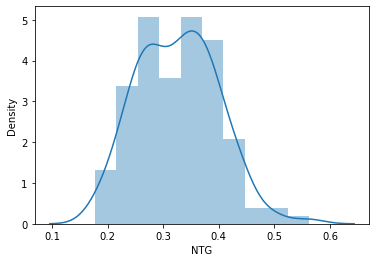

In [25]:
sns.distplot(df.NTG)

In [26]:
X = df.drop(['Well','NTG'], axis=1)
y = df['NTG']

In [27]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
print(f"full set size: {y.shape[0]+submit_df['X'].shape[0]}")
print(f"known set size: {y.shape[0]}")
print(f"train set size: {y_train.shape[0]}")
print(f"validation set size: {y_validation.shape[0]}")

full set size: 1380
known set size: 138
train set size: 103
validation set size: 35


In [12]:
categorical_features_indices = [0, 1]

In [13]:
model = CatBoostRegressor(iterations=250,
                           learning_rate=1,
                           depth=2)

In [14]:
model.fit(
    X_train, y_train,
    #cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
    logging_level='Verbose',  # you can uncomment this for text output
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0656815	test: 0.0644986	best: 0.0644986 (0)	total: 46.6ms	remaining: 11.6s
1:	learn: 0.0602713	test: 0.0705499	best: 0.0644986 (0)	total: 47.2ms	remaining: 5.85s
2:	learn: 0.0591614	test: 0.0692360	best: 0.0644986 (0)	total: 47.7ms	remaining: 3.93s
3:	learn: 0.0576406	test: 0.0659153	best: 0.0644986 (0)	total: 48.4ms	remaining: 2.97s
4:	learn: 0.0540260	test: 0.0621120	best: 0.0621120 (4)	total: 48.6ms	remaining: 2.38s
5:	learn: 0.0528030	test: 0.0617520	best: 0.0617520 (5)	total: 48.7ms	remaining: 1.98s
6:	learn: 0.0514391	test: 0.0618386	best: 0.0617520 (5)	total: 48.9ms	remaining: 1.7s
7:	learn: 0.0504787	test: 0.0610262	best: 0.0610262 (7)	total: 49.1ms	remaining: 1.48s
8:	learn: 0.0481831	test: 0.0636236	best: 0.0610262 (7)	total: 49.2ms	remaining: 1.32s
9:	learn: 0.0469107	test: 0.0638173	best: 0.0610262 (7)	total: 49.4ms	remaining: 1.19s
10:	learn: 0.0460460	test: 0.0648867	best: 0.0610262 (7)	total: 49.5ms	remaining: 1.08s
11:	learn: 0.0427149	test: 0.0587235	best: 

In [15]:
preds_catbost = model.predict(X_validation)
mean_squared_error(y_validation, preds_catbost, squared=False)

0.055715923252217525

(1242, 2) (1242,)
      Well    X    Y       NTG
0  201-901  201  901  0.229100
1  201-902  201  902  0.229100
2  201-903  201  903  0.259302
3  201-904  201  904  0.221863
4  201-905  201  905  0.253343
submisstion_25_02_2021_14_56_00


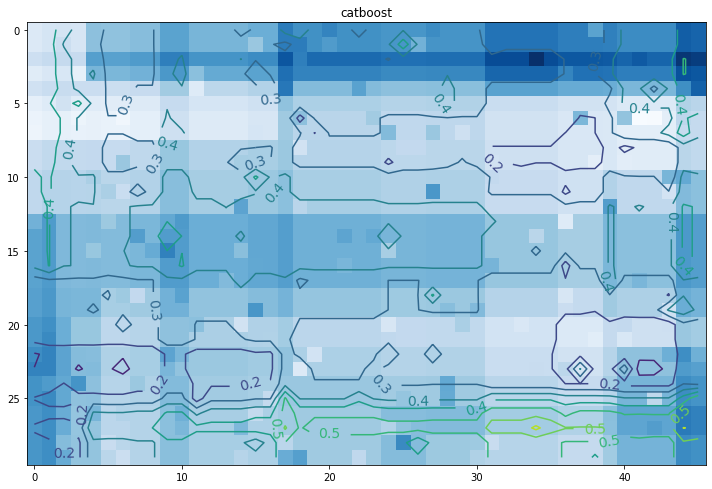

In [17]:
#submit 1
from datetime import datetime
submit_df = pd.read_csv("data/Empty_part.csv")
submit_X = submit_df.drop(['Well'], axis=1)
submit_preds = model.predict(submit_X)
print(submit_X.shape, submit_preds.shape)
submit_df = pd.concat([submit_df, pd.Series(submit_preds, name='NTG')], axis = 1)
print(submit_df.head())
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
#print(dt_string)
#submit_df.to_csv(f'submisstion_{dt_string}.csv', index=False)
print('submisstion_25_02_2021_14_56_00')
z = vizualize_submit(df, submit_df)
plot_image(z, "catboost")

/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


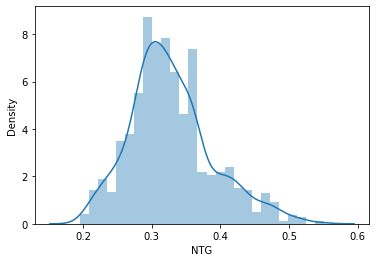

In [18]:
sns.distplot(submit_df.NTG)

### Try 2 - qgis+kriging

![img](img/01.png)

In [10]:
print('interpolated_submisstion_25_02_2021_16_03_57')

interpolated_submisstion_25_02_2021_16_03_57


#### Compere catboost and kriging

catboost vs qgis rmse:  0.045189248895576024


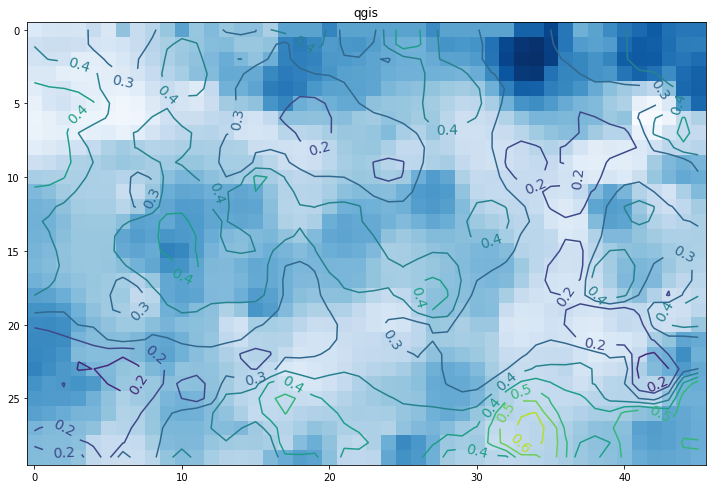

In [19]:
enterpolated_df = pd.read_csv("data/Empty_part_enterpolated.csv")
enterpolated_y = enterpolated_df['NTG']
print('catboost vs qgis rmse: ',mean_squared_error(enterpolated_y, submit_preds, squared=False))

z = vizualize_submit(df, enterpolated_df)
plot_image(z, "qgis")

/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


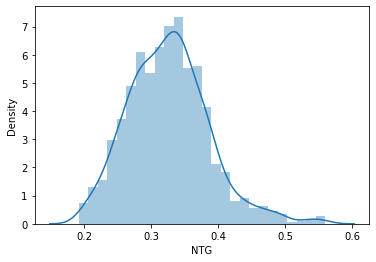

In [20]:
sns.distplot(enterpolated_df.NTG)

### Try 3 - GaussianProcessRegressor

In [12]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel = RBF(length_scale=1000)
regressor = GPR(kernel=kernel, n_restarts_optimizer=100)
regressor.fit(
    X_train, y_train
)
preds, sigma = regressor.predict(X_validation, return_std=True)
mean_squared_error(y_validation, preds, squared=False)

0.13908995399020796

### Try 4 - OrdinaryKriging

In [21]:
import pykrige
from pykrige.uk import UniversalKriging

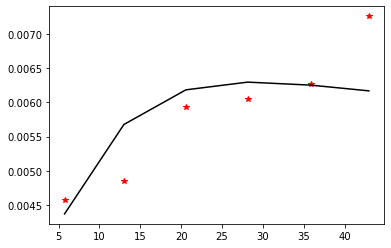

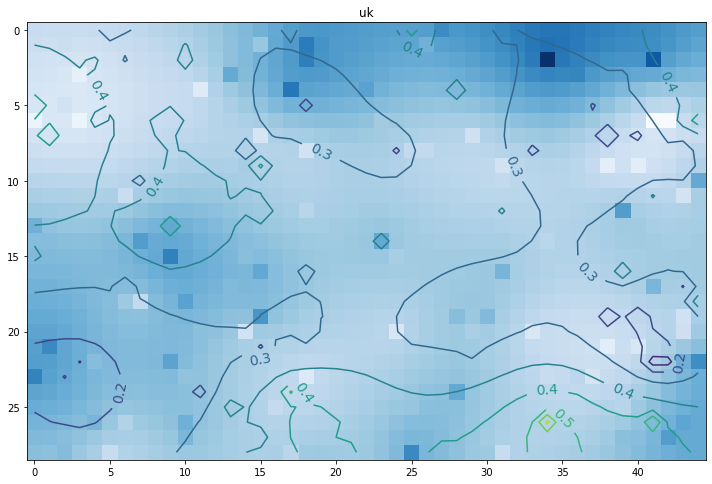

In [22]:
gridx = np.arange(201.0, 246.0, 1.0)
gridy = np.arange(901.0, 930.0, 1.0)
x = X_train['X'].to_numpy(dtype = np.float64)
y = X_train['Y'].to_numpy(dtype = np.float64)
z = y_train.to_numpy(dtype = np.float64)

UK = UniversalKriging(
    x=x, 
    y=y, 
    z=z,
    variogram_model="hole-effect",
    drift_terms=["regional_linear"],
    nlags=6,
    enable_plotting=True
)

z, ss = UK.execute("grid", gridx, gridy)
plot_image(z, "uk")

/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


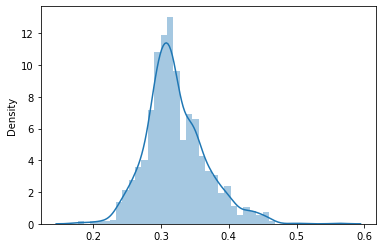

In [23]:
sns.distplot(z)

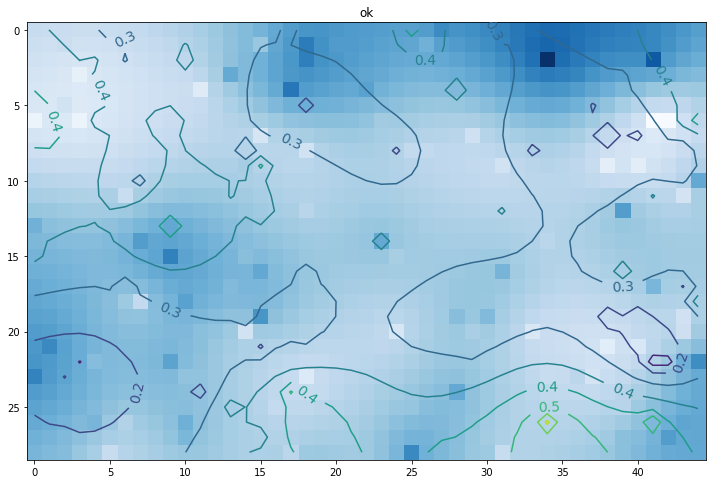

In [24]:
import pykrige
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt

gridx = np.arange(201.0, 246.0, 1.0)
gridy = np.arange(901.0, 930.0, 1.0)
x = X_train['X'].to_numpy(dtype = np.float64)
y = X_train['Y'].to_numpy(dtype = np.float64)
z = y_train.to_numpy(dtype = np.float64)

OK = OrdinaryKriging(
    x=x, 
    y=y, 
    z=z,
    nlags=2, variogram_model="exponential", weight=False
)

z, ss = OK.execute("grid", gridx, gridy)
plot_image(z, "ok")

/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


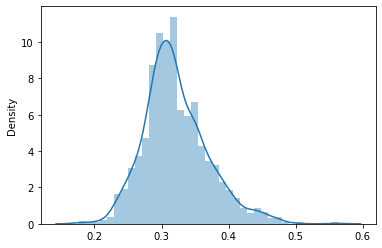

In [25]:
sns.distplot(z)

### Krige CV

In [30]:
import numpy as np
from pykrige.rk import Krige
from sklearn.model_selection import GridSearchCV

# 2D Kring params
param_dict = {
    "method": ["ordinary", "universal"],
    "variogram_model": ["linear", "power", "gaussian", "spherical", "exponential", "hole-effect"],
    "nlags": [2, 4, 6, 8, 10],
    "weight": [True, False]
}

estimator = GridSearchCV(Krige(), param_dict, verbose=True, return_train_score=True)

X = X_train.to_numpy(dtype = np.float64)
y = y_train.to_numpy(dtype = np.float64)
X_val = X_validation.to_numpy(dtype = np.float64)
y_val = y_validation.to_numpy(dtype = np.float64)

# run the gridsearch
estimator.fit(X=X, y=y)

if hasattr(estimator, "best_score_"):
    print("best_score R² = {:.3f}".format(estimator.best_score_))
    print("best_params = ", estimator.best_params_)

print("\nCV results::")
if hasattr(estimator, "cv_results_"):
    for key in [
        "mean_test_score",
        "mean_train_score",
        "param_method",
        "param_variogram_model",
    ]:
        print(" - {} : {}".format(key, estimator.cv_results_[key]))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ign

n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ign

n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ign

n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ign

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   28.6s finished


GridSearchCV(estimator=Krige(),
             param_grid={'method': ['ordinary', 'universal'],
                         'nlags': [2, 4, 6, 8, 10],
                         'variogram_model': ['linear', 'power', 'gaussian',
                                             'spherical', 'exponential',
                                             'hole-effect'],
                         'weight': [True, False]},
             return_train_score=True, verbose=True)

0:00:00.079857
(1242, 2) (1242,)
      Well    X    Y       NTG
0  201-901  201  901  0.255166
1  201-902  201  902  0.251093
2  201-903  201  903  0.243193
3  201-904  201  904  0.239385
4  201-905  201  905  0.233539
submisstion_27_02_2021_09_53_43


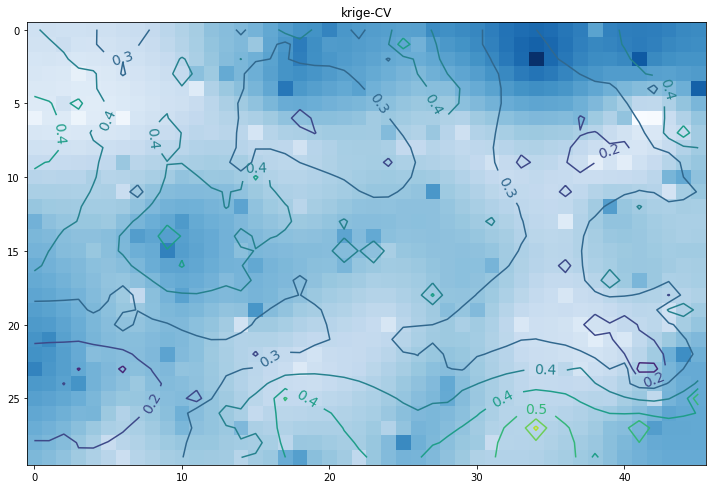

In [34]:
from datetime import datetime
X = X_train.to_numpy(dtype = np.float64)
y = y_train.to_numpy(dtype = np.float64)
X_full = df.drop(['Well','NTG'], axis=1).to_numpy(dtype = np.float64)
y_full = df['NTG'].to_numpy(dtype = np.float64)
submit_df = pd.read_csv("data/Empty_part.csv")
submit_X = submit_df.drop(['Well'], axis=1).to_numpy(dtype = np.float64)

params = {'method': 'ordinary', 'nlags': 2, 'variogram_model': 'exponential', 'weight': False}
krige = Krige(method="ordinary", nlags=2, variogram_model="exponential", weight=False)
krige.fit(X, y)
preds_krige = krige.predict(X_validation.to_numpy(dtype = np.float64))
mean_squared_error(y_validation, preds_krige, squared=False)

start = datetime.now()
preds_krige_submit = krige.predict(submit_X)
print(datetime.now() - start)

krige = Krige(method="ordinary", nlags=2, variogram_model="exponential", weight=False)
krige.fit(X_full, y_full)
preds_krige_submit_full = krige.predict(submit_X)
mean_squared_error(preds_krige_submit, preds_krige_submit_full, squared=False)

submit_preds = (preds_krige_submit_full+preds_krige_submit)/2

print(submit_X.shape, submit_preds.shape)
submit_df = pd.concat([submit_df, pd.Series(submit_preds, name='NTG')], axis = 1)
print(submit_df.head())
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
#print(dt_string)
#submit_df.to_csv(f'submisstion_{dt_string}.csv', index=False)
print('submisstion_27_02_2021_09_53_43')

z = vizualize_submit(df, submit_df)
plot_image(z, "krige-CV")

/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


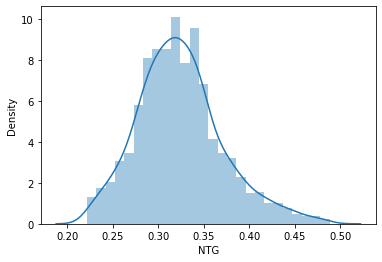

In [28]:
sns.distplot(submit_df.NTG)

### Regression Kriging

In [37]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

from pykrige.rk import RegressionKriging

svr_model = SVR(C=0.1, gamma="auto")
rf_model = RandomForestRegressor(n_estimators=100)
lr_model = LinearRegression(normalize=True, copy_X=True, fit_intercept=False)
kernel = C(0.1, (1e-3, 1e3)) * RBF(2, (1e-2, 1e2))
gpr_model = GPR(kernel=kernel, n_restarts_optimizer=10)

models = [svr_model, rf_model, lr_model]
X = X_train.to_numpy(dtype = np.float64)
y = y_train.to_numpy(dtype = np.float64)
X_val = X_validation.to_numpy(dtype = np.float64)
y_val = y_validation.to_numpy(dtype = np.float64)

for m in models:
    print("=" * 40)
    print("regression model:", m.__class__.__name__)
    m_rk = RegressionKriging(
        method="ordinary",
        nlags=2,
        variogram_model="exponential",
        weight=False,
        regression_model=m, 
        n_closest_points=10)
    m_rk.fit(X, X, y)
    print("Regression Score: ", m_rk.regression_model.score(X_val, y_val))
    print("RK score: ", m_rk.score(X_val, X_val, y_val))
    preds = m_rk.predict(X_val, X_val)
    print("rmse", mean_squared_error(y_validation, preds, squared=False))

regression model: SVR
Finished learning regression model
Finished kriging residuals
Regression Score:  0.00764997440905979
RK score:  0.18881825929349916
rmse 0.057494090023485246
regression model: RandomForestRegressor
Finished learning regression model
Finished kriging residuals
Regression Score:  -0.04526425884397711
RK score:  -0.017874308072885148
rmse 0.06440375626655558
regression model: LinearRegression
Finished learning regression model
Finished kriging residuals
Regression Score:  -0.08496994751558673
RK score:  0.2813882466207275
rmse 0.05411420462468846


Finished learning regression model
Finished kriging residuals
Regression Score:  -0.058928715187108294
RK score:  1.0
0:00:00.077371
(1242, 2) (1242,)
      Well    X    Y       NTG
0  201-901  201  901  0.253127
1  201-902  201  902  0.250084
2  201-903  201  903  0.240162
3  201-904  201  904  0.238115
4  201-905  201  905  0.232065
submisstion_27_02_2021_10_07_35


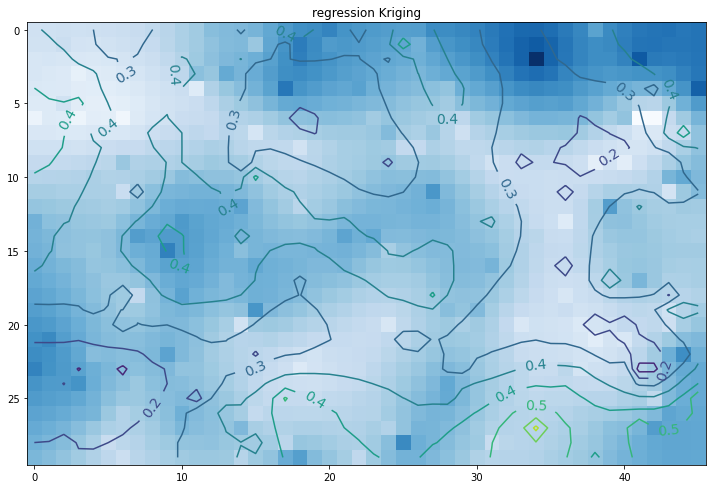

In [41]:
X = X_train.to_numpy(dtype = np.float64)
y = y_train.to_numpy(dtype = np.float64)
X_val = X_validation.to_numpy(dtype = np.float64)
y_val = y_validation.to_numpy(dtype = np.float64)
X_full = df.drop(['Well','NTG'], axis=1).to_numpy(dtype = np.float64)
y_full = df['NTG'].to_numpy(dtype = np.float64)
submit_df = pd.read_csv("data/Empty_part.csv")
submit_X = submit_df.drop(['Well'], axis=1).to_numpy(dtype = np.float64)

m_rk = RegressionKriging(
        method="ordinary",
        nlags=2,
        variogram_model="exponential",
        weight=False,
        regression_model=lr_model, 
        n_closest_points=10)
m_rk.fit(X_full, X_full, y_full)
print("Regression Score: ", m_rk.regression_model.score(X_val, y_val))
print("RK score: ", m_rk.score(X_val, X_val, y_val))

start = datetime.now()
submit_preds = m_rk.predict(submit_X, submit_X)
print(datetime.now() - start)
print(submit_X.shape, submit_preds.shape)
submit_df = pd.concat([submit_df, pd.Series(submit_preds, name='NTG')], axis = 1)
print(submit_df.head())
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
#print(dt_string)
#submit_df.to_csv(f'submisstion_{dt_string}.csv', index=False)
print('submisstion_27_02_2021_10_07_35')

z = vizualize_submit(df, submit_df)
plot_image(z, "regression Kriging")

/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


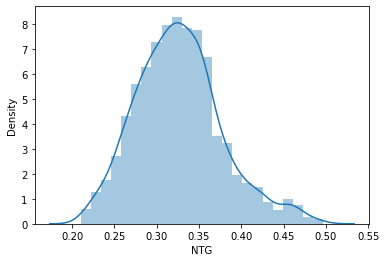

In [31]:
sns.distplot(submit_df.NTG)

### try 5 - clusters + regressor (rf)

#### SpectralClustering

/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/sklearn/cluster/_spectral.py:504: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


[0, 1, 2, 3, 4, 5]


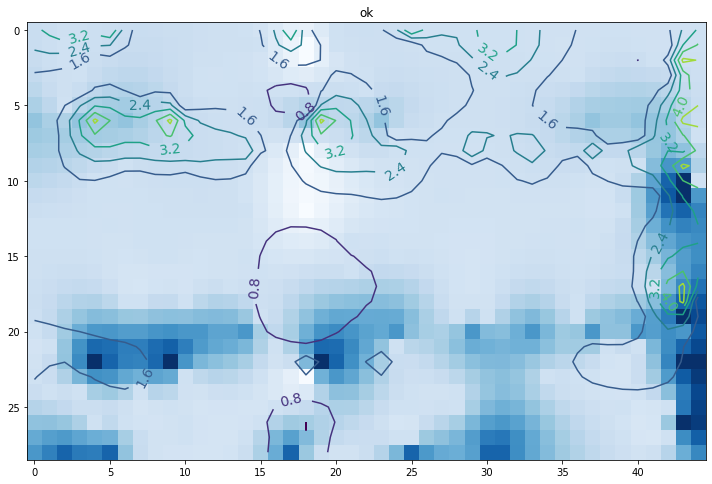

In [32]:
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import SpectralClustering

data = df.drop(['Well'], axis=1)
distance_metcric = squareform(pdist(data, metric='jaccard'))
clust = SpectralClustering(n_clusters=6)
clust_labels = clust.fit_predict(distance_metcric)
labels_set = list(set(clust_labels))
print(labels_set)
datadet_clusters = pd.concat([data, pd.Series(clust_labels, name='class')], axis = 1)

gridx = np.arange(201.0, 246.0, 1.0)
gridy = np.arange(901.0, 930.0, 1.0)
x = datadet_clusters['X'].to_numpy(dtype = np.float64)
y = datadet_clusters['Y'].to_numpy(dtype = np.float64)
z = datadet_clusters['class'].to_numpy(dtype = np.float64)

OK = OrdinaryKriging(
    x=x, 
    y=y, 
    z=z,
    nlags=2, variogram_model="exponential", weight=False
)

z, ss = OK.execute("grid", gridx, gridy)
plot_image(z, "ok")

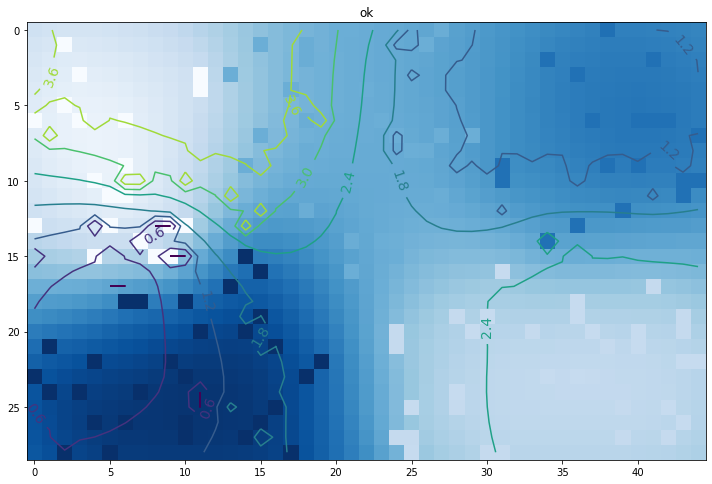

In [33]:
from sklearn.cluster import KMeans

data = df.drop(['Well'], axis=1)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
clust_labels = kmeans.fit_predict(data)
datadet_clusters = pd.concat([data, pd.Series(clust_labels, name='class')], axis = 1)

gridx = np.arange(201.0, 246.0, 1.0)
gridy = np.arange(901.0, 930.0, 1.0)
x = datadet_clusters['X'].to_numpy(dtype = np.float64)
y = datadet_clusters['Y'].to_numpy(dtype = np.float64)
z = datadet_clusters['class'].to_numpy(dtype = np.float64)

OK = OrdinaryKriging(
    x=x, 
    y=y, 
    z=z,
    nlags=2, variogram_model="exponential", weight=False
)

z, ss = OK.execute("grid", gridx, gridy)
plot_image(z, "ok")

(1242,)
rmse:  0.028717527900746588


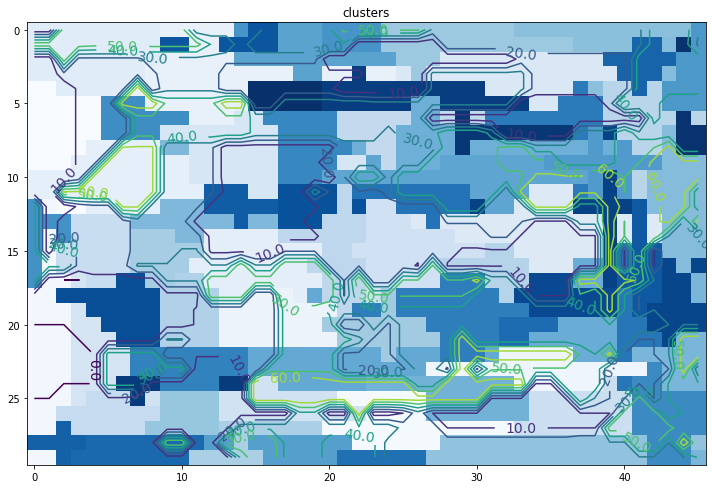

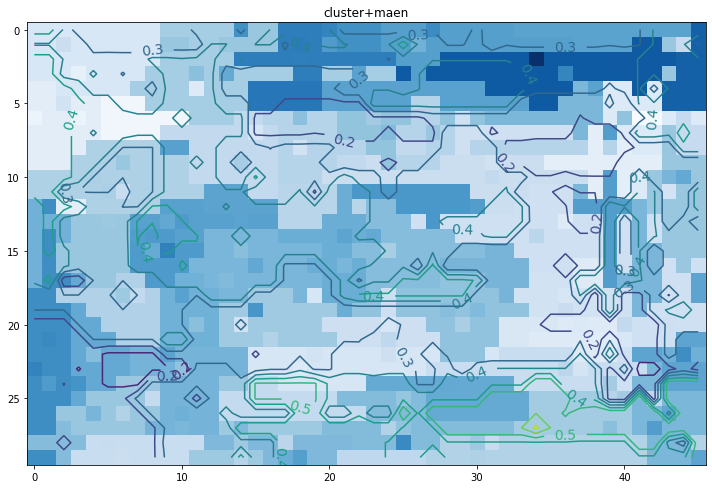

In [34]:
from sklearn.ensemble import RandomForestClassifier

def vizualize_classes(train, submit):
    matrix = np.zeros(shape=(30, 46), dtype=np.float64) 
    for x in range(201, 247):
        for y in range(901, 931):
            try:
                sub_df = submit[submit['X'] == x]
                val = sub_df[sub_df['Y'] == y]['class'].values[0]
            except:
                sub_df = train[train['X'] == x]
                val = sub_df[sub_df['Y'] == y]['class'].values[0]
            matrix[y-931][x-201]=val
    return matrix


from sklearn.cluster import Birch
data = df.drop(['Well'], axis=1)
submit_df = pd.read_csv("data/Empty_part.csv")

bitch = Birch(n_clusters=70)
clust_labels = bitch.fit_predict(data)
datadet_clusters = pd.concat([data, pd.Series(clust_labels, name='class')], axis = 1)

train_x = datadet_clusters.drop(['NTG', 'class'], axis=1).to_numpy(dtype = np.float64)
train_y = datadet_clusters['class'].to_numpy(dtype = np.float64)
submit_x = submit_df.drop(['Well'], axis=1).to_numpy(dtype = np.float64)

rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
clusters = rfc.predict(submit_x)

print(clusters.shape)
clusters_int = np.zeros(clusters.shape).astype(np.int64)
for i in range(clusters.shape[0]):
        clusters_int[i] = round(clusters[i])

submit_df = pd.concat([submit_df, pd.Series(clusters_int, name='class')], axis = 1)
arr = vizualize_classes(datadet_clusters, submit_df)
plot_image(arr, "clusters")

X = datadet_clusters.drop(['NTG'], axis=1)
y = datadet_clusters['NTG']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, random_state=42)

missed_val = []
for col in X_validation['class']:
    sub_df = datadet_clusters[datadet_clusters['class'] == col]
    val = sub_df['NTG'].mean()
    missed_val.append(val)
print('rmse: ', mean_squared_error(y_validation, missed_val, squared=False))

missed_val = []
for col in submit_df['class']:
    sub_df = datadet_clusters[datadet_clusters['class'] == col]
    val = sub_df['NTG'].mean()
    missed_val.append(val)
submit_df = pd.concat([submit_df, pd.Series(missed_val, name='NTG')], axis = 1)    

z = vizualize_submit(datadet_clusters, submit_df)
plot_image(z, "cluster+maen")

      Well    X    Y       NTG
0  201-901  201  901  0.236000
1  201-902  201  902  0.236000
2  201-903  201  903  0.236000
3  201-904  201  904  0.236000
4  201-905  201  905  0.216567
submisstion_28_02_2021_12_51_08


/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


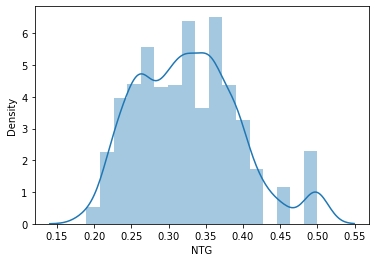

In [35]:
print(submit_df.drop(['class'], axis=1).head())
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
#print(dt_string)
#submit_df.drop(['class'], axis=1).to_csv(f'submisstion_{dt_string}.csv', index=False)
print('submisstion_28_02_2021_12_51_08')
sns.distplot(submit_df.NTG)

### try 6 - catboost + classes

       X    Y  class
134  245  911     30
131  244  923     32
0    201  907      0
126  243  928     45
101  235  915      9


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0721939	test: 0.0652563	best: 0.0652563 (0)	total: 972us	remaining: 242ms
1:	learn: 0.0629603	test: 0.0649853	best: 0.0649853 (1)	total: 1.98ms	remaining: 246ms
2:	learn: 0.0612590	test: 0.0657797	best: 0.0649853 (1)	total: 2.93ms	remaining: 242ms
3:	learn: 0.0602095	test: 0.0661718	best: 0.0649853 (1)	total: 3.6ms	remaining: 222ms
4:	learn: 0.0574325	test: 0.0615698	best: 0.0615698 (4)	total: 4.47ms	remaining: 219ms
5:	learn: 0.0544229	test: 0.0658527	best: 0.0615698 (4)	total: 5.51ms	remaining: 224ms
6:	learn: 0.0525261	test: 0.0639355	best: 0.0615698 (4)	total: 6.16ms	remaining: 214ms
7:	learn: 0.0507755	test: 0.0631713	best: 0.0615698 (4)	total: 7.67ms	remaining: 232ms
8:	learn: 0.0488021	test: 0.0650496	best: 0.0615698 (4)	total: 8.5ms	remaining: 228ms
9:	learn: 0.0471016	test: 0.0617032	best: 0.0615698 (4)	total: 8.89ms	remaining: 213ms
10:	learn: 0.0458567	test: 0.0614081	best: 0.0614081 (10)	total: 9.63ms	remaining: 209ms
11:	learn: 0.0442795	test: 0.0614976	best: 0

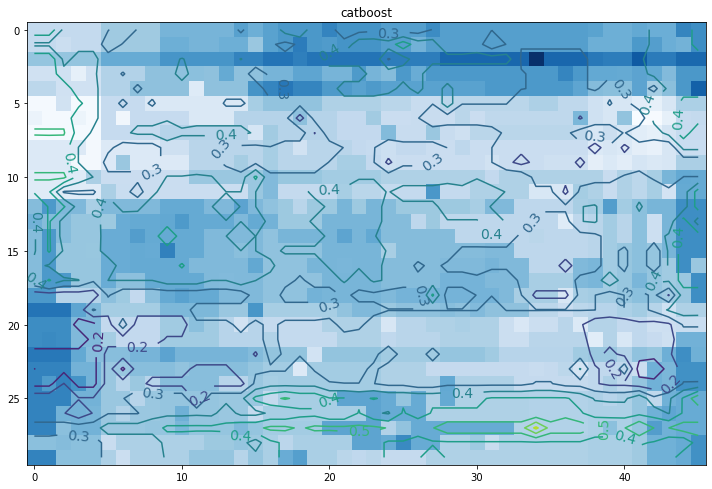

In [36]:
X = datadet_clusters.drop(['NTG'], axis=1)
y = datadet_clusters['NTG']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.head())

model = CatBoostRegressor(iterations=250,
                           learning_rate=1,
                           depth=2)
model.fit(
    X_train, y_train,
    #cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
    logging_level='Verbose',  # you can uncomment this for text output
    plot=True
)

preds = model.predict(X_validation)
print('rmse: ', mean_squared_error(y_validation, preds, squared=False))

s_df = submit_df.drop(['NTG'], axis=1)
submit_X = s_df.drop(['Well'], axis=1)
submit_preds = model.predict(submit_X)
print(submit_X.shape, submit_preds.shape)
s_df = pd.concat([s_df, pd.Series(submit_preds, name='NTG')], axis = 1)
print(s_df.head())
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
#print(dt_string)
#s_df.drop(['class'], axis=1).to_csv(f'submisstion_{dt_string}.csv', index=False)
print('submisstion_28_02_2021_15_04_27')
z = vizualize_submit(datadet_clusters, s_df)
plot_image(z, "catboost")

/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


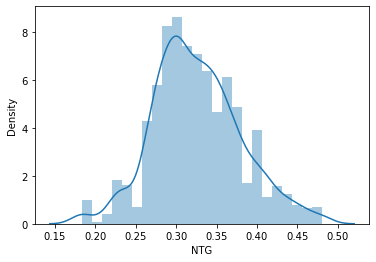

In [37]:
sns.distplot(s_df.NTG)

### Try 7 - RandomForestRegressor + classes

rmse:  0.06546132622887042
(1242, 3) (1242,)
      Well    X    Y  class       NTG
0  201-901  201  901      8  0.303195
1  201-902  201  902      8  0.302427
2  201-903  201  903      8  0.317461
3  201-904  201  904      8  0.264105
4  201-905  201  905      0  0.249391
submisstion_28_02_2021_19_15_48


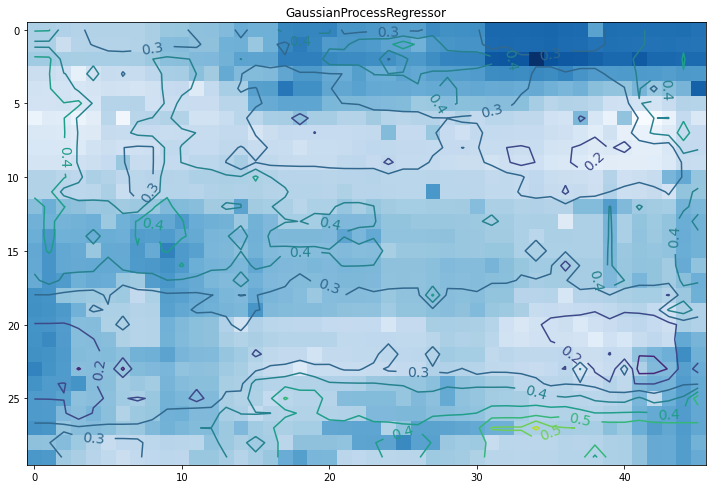

In [42]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=1000)
regressor.fit(
    X_train, y_train
)
preds = regressor.predict(X_validation)
print('rmse: ', mean_squared_error(y_validation, preds, squared=False))

s_df = submit_df.drop(['NTG'], axis=1)
submit_X = s_df.drop(['Well'], axis=1)
submit_preds = regressor.predict(submit_X)
print(submit_X.shape, submit_preds.shape)
s_df = pd.concat([s_df, pd.Series(submit_preds, name='NTG')], axis = 1)
print(s_df.head())
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
#print(dt_string)
#s_df.drop(['class'], axis=1).to_csv(f'submisstion_{dt_string}.csv', index=False)
print('submisstion_28_02_2021_19_15_48')
z = vizualize_submit(datadet_clusters, s_df)
plot_image(z, "GaussianProcessRegressor")

/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


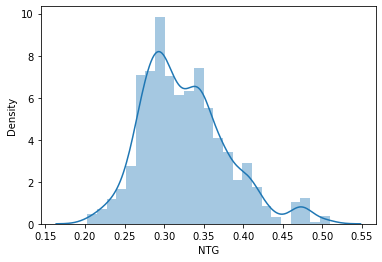

In [43]:
sns.distplot(s_df.NTG)

### try 9 - verde.Spline

/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1242, 3) (1242,)
      Well    X    Y  class       NTG
0  201-901  201  901      8  0.269730
1  201-902  201  902      8  0.260626
2  201-903  201  903      8  0.250386
3  201-904  201  904      8  0.240673
4  201-905  201  905      0  0.231600
submisstion_28_02_2021_20_28_38


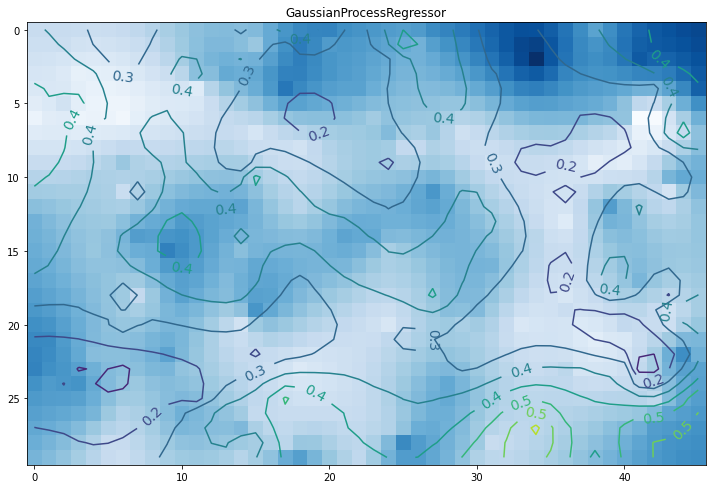

In [102]:
import verde as vd

x = df['X'].to_numpy(dtype = np.float64)
y = df['Y'].to_numpy(dtype = np.float64)
z = df['NTG'].to_numpy(dtype = np.float64)

x_test = submit_df['X'].to_numpy(dtype = np.float64)
y_test = submit_df['Y'].to_numpy(dtype = np.float64)
z_test = submit_df['NTG'].to_numpy(dtype = np.float64)

spline = vd.Spline(mindist=500, damping=1e-8)
spline.fit((x, y), z)
submit_preds = spline.predict((x_test, y_test))

s_df = submit_df.drop(['NTG'], axis=1)
submit_X = s_df.drop(['Well'], axis=1)
print(submit_X.shape, submit_preds.shape)
s_df = pd.concat([s_df, pd.Series(submit_preds, name='NTG')], axis = 1)
print(s_df.head())
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
#print(dt_string)
#s_df.drop(['class'], axis=1).to_csv(f'submisstion_{dt_string}.csv', index=False)
print('submisstion_28_02_2021_20_28_38')
z = vizualize_submit(datadet_clusters, s_df)
plot_image(z, "GaussianProcessRegressor")

/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


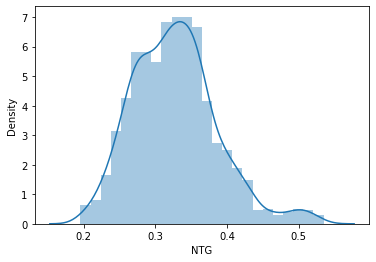

In [103]:
sns.distplot(s_df.NTG)

In [75]:
submit_df

/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Well    X    Y  class       NTG
0     201-901  201  901      8  0.236000
1     201-902  201  902      8  0.236000
2     201-903  201  903      8  0.236000
3     201-904  201  904      8  0.236000
4     201-905  201  905      0  0.216567
...       ...  ...  ...    ...       ...
1237  246-926  246  926     45  0.354400
1238  246-927  246  927     45  0.354400
1239  246-928  246  928     45  0.354400
1240  246-929  246  929     28  0.296433
1241  246-930  246  930     32  0.385867

[1242 rows x 5 columns]

### try 10 - stack all models

/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      Well    X    Y  class       NTG
0  201-901  201  901      8  0.258805
1  201-902  201  902      8  0.260018
2  201-903  201  903      8  0.273182
3  201-904  201  904      8  0.242498
4  201-905  201  905      0  0.245513
28_02_2021_22_24_04
stack_submisstion_28_02_2021_20_28_38


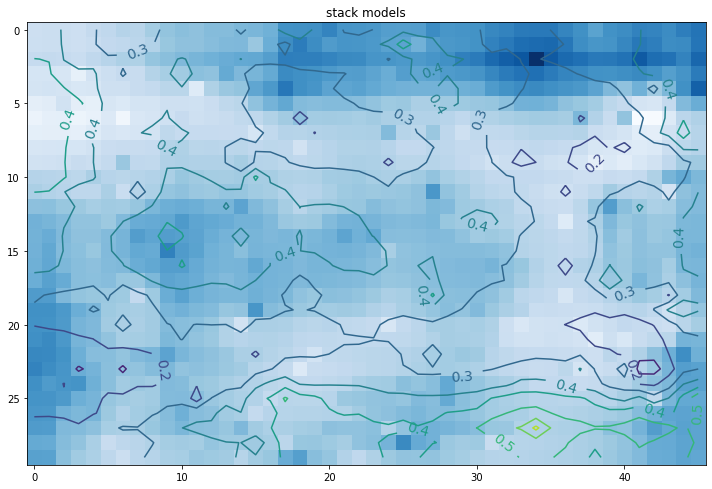

In [108]:
files = [
    "submisstion_25_02_2021_14_56_00.csv",
    "submisstion_27_02_2021_09_53_43.csv",
    "submisstion_27_02_2021_10_07_35.csv",
    "submisstion_28_02_2021_12_51_08.csv",
    "submisstion_28_02_2021_14_43_28.csv",
    "submisstion_28_02_2021_15_04_27.csv",
    "submisstion_28_02_2021_19_15_48.csv",
    "submisstion_28_02_2021_20_28_38.csv",
    "interpolated_submisstion_25_02_2021_16_03_57.csv"
]
s_df = submit_df.drop(['NTG'], axis=1)


stack_ntg = np.zeros(s_df['X'].shape).astype(np.float64)

for fname in files:
    sub_df = pd.read_csv(fname)
    ntg = sub_df['NTG'].to_numpy(dtype = np.float64)
    stack_ntg += ntg

stack_ntg = stack_ntg / len(files)

s_df = pd.concat([s_df, pd.Series(stack_ntg, name='NTG')], axis = 1)
print(s_df.head())
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
#print(dt_string)
#s_df.drop(['class'], axis=1).to_csv(f'stack_submisstion_{dt_string}.csv', index=False)
print('stack_submisstion_28_02_2021_22_24_04')
z = vizualize_submit(datadet_clusters, s_df)
plot_image(z, "stack models")

/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


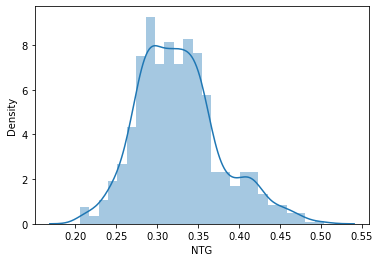

In [109]:
sns.distplot(s_df.NTG)

/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      Well    X    Y  class       NTG
0  201-901  201  901      8  0.244943
1  201-902  201  902      8  0.251268
2  201-903  201  903      8  0.244862
3  201-904  201  904      8  0.236830
4  201-905  201  905      0  0.223391
stack_submisstion_28_02_2021_22_39_59


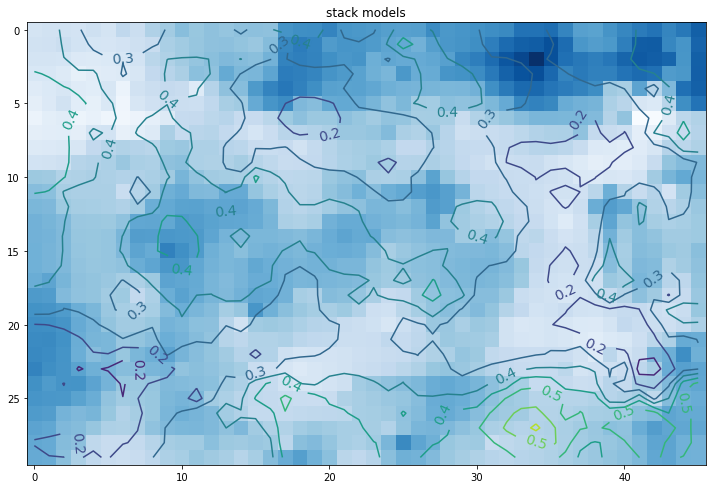

In [123]:
# stack submisstion to get better distribution
files = [
    "submisstion_28_02_2021_12_51_08.csv",
    "submisstion_28_02_2021_20_28_38.csv",
    "interpolated_submisstion_25_02_2021_16_03_57.csv"
]
s_df = submit_df.drop(['NTG'], axis=1)


stack_ntg = np.zeros(s_df['X'].shape).astype(np.float64)

for fname in files:
    sub_df = pd.read_csv(fname)
    ntg = sub_df['NTG'].to_numpy(dtype = np.float64)
    stack_ntg += ntg

stack_ntg = stack_ntg / len(files)

s_df = pd.concat([s_df, pd.Series(stack_ntg, name='NTG')], axis = 1)
print(s_df.head())
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
#print(dt_string)
#s_df.drop(['class'], axis=1).to_csv(f'stack_submisstion_{dt_string}.csv', index=False)
print('stack_submisstion_28_02_2021_22_39_59')
z = vizualize_submit(datadet_clusters, s_df)
plot_image(z, "stack models")

/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


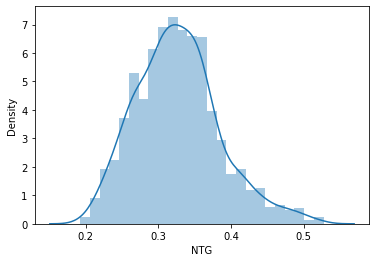

In [121]:
sns.distplot(s_df.NTG)

      Well    X    Y       NTG
0  201-901  201  901  0.255687
1  201-902  201  902  0.242261
2  201-903  201  903  0.245783
3  201-904  201  904  0.233349
4  201-905  201  905  0.231452
stack_submisstion_28_02_2021_22_39_59


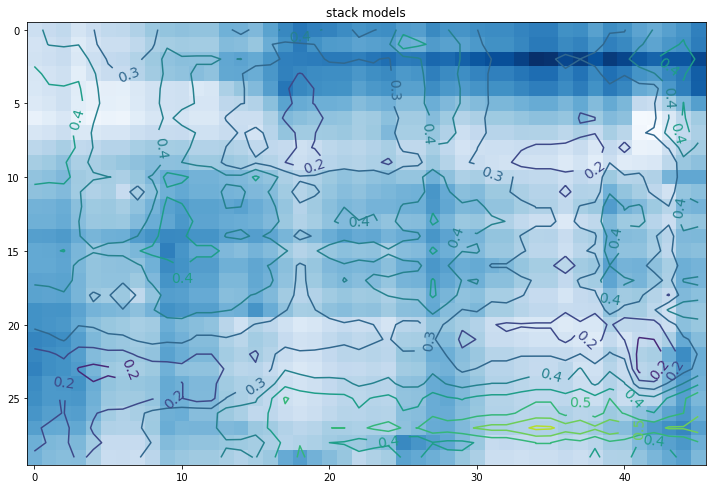

In [7]:
from datetime import datetime
submit_df = pd.read_csv("data/Empty_part.csv")

files = [
    "submit_grid_search_FULL.csv"
]
s_df = submit_df#.drop(['NTG'], axis=1)


stack_ntg = np.zeros(s_df['X'].shape).astype(np.float64)

for fname in files:
    sub_df = pd.read_csv(fname)
    ntg = sub_df['NTG'].to_numpy(dtype = np.float64)
    stack_ntg += ntg

stack_ntg = stack_ntg / len(files)

s_df = pd.concat([s_df, pd.Series(stack_ntg, name='NTG')], axis = 1)
print(s_df.head())
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
#print(dt_string)
#s_df.drop(['class'], axis=1).to_csv(f'stack_submisstion_{dt_string}.csv', index=False)
print('stack_submisstion_28_02_2021_22_39_59')
z = vizualize_submit(df, s_df)
plot_image(z, "stack models")

/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


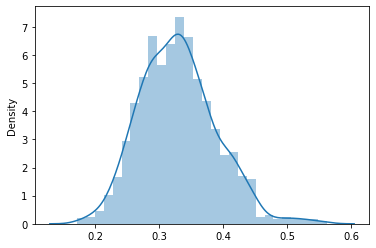

In [8]:
sns.distplot(z)

      Well    X    Y       NTG
0  201-901  201  901  0.250315
1  201-902  201  902  0.246764
2  201-903  201  903  0.245322
3  201-904  201  904  0.235089
4  201-905  201  905  0.227422
02_03_2021_23_54_05
stack_submisstion_28_02_2021_22_39_59


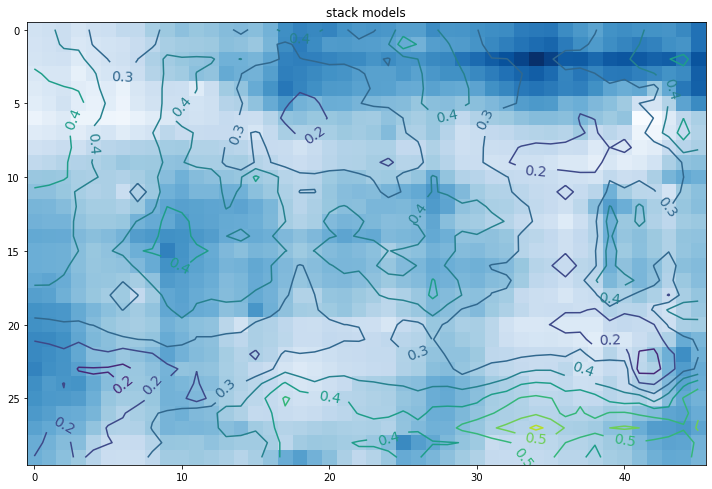

In [9]:
from datetime import datetime
submit_df = pd.read_csv("data/Empty_part.csv")

files = [
    "submit_grid_search_FULL.csv",
    "stack_submisstion_28_02_2021_22_39_59.csv"
]
s_df = submit_df#.drop(['NTG'], axis=1)


stack_ntg = np.zeros(s_df['X'].shape).astype(np.float64)

for fname in files:
    sub_df = pd.read_csv(fname)
    ntg = sub_df['NTG'].to_numpy(dtype = np.float64)
    stack_ntg += ntg

stack_ntg = stack_ntg / len(files)

s_df = pd.concat([s_df, pd.Series(stack_ntg, name='NTG')], axis = 1)
print(s_df.head())
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
print(dt_string)
#s_df.to_csv(f'stack_submisstion_{dt_string}.csv', index=False)
print('stack_submisstion_28_02_2021_22_39_59')
z = vizualize_submit(df, s_df)
plot_image(z, "stack models")

/home/gosha20777/anaconda3/envs/ml-py3-7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


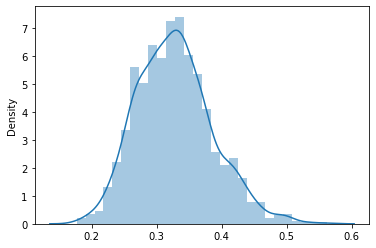

In [10]:
sns.distplot(z)

### try - 8 Deep Laerning

In [103]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

def base_model():
    model = Sequential()
    model.add(Dense(3, input_dim=3, 
                    kernel_initializer = "uniform", 
                    activation=tf.keras.activations.swish
                   ))
    model.add(Dense(9, activation='softplus'))
    model.add(Dense(1))
    return model

model = base_model()
model.compile(loss='mse',
              metrics = [tf.keras.metrics.RootMeanSquaredError()],
              optimizer = 'adam')
model.summary()
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_validation, y_validation),
          batch_size=3,
          epochs=10
         )
model.predict(X_validation)[:10]

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_338 (Dense)            (None, 3)                 12        
_________________________________________________________________
dense_339 (Dense)            (None, 9)                 36        
_________________________________________________________________
dense_340 (Dense)            (None, 1)                 10        
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
35/35 [==============================] - 0s 3ms/step - loss: 0.4724 - root_mean_squared_error: 0.6873 - val_loss: 0.0217 - val_root_mean_squared_error: 0.1472
Epoch 2/10
35/35 [==============================] - 0s 1ms/step - loss: 0.0122 - root_mean_squared_error: 0.1105 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0829
Epoch 3/10
35/35 [=============================

array([[0.30678853],
       [0.27733523],
       [0.28900516],
       [0.22351456],
       [0.2870737 ],
       [0.31242365],
       [0.2750299 ],
       [0.33985788],
       [0.29466006],
       [0.31708694]], dtype=float32)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0688330	test: 0.0621434	best: 0.0621434 (0)	total: 393us	remaining: 97.9ms
1:	learn: 0.0687872	test: 0.0625953	best: 0.0621434 (0)	total: 1.39ms	remaining: 172ms
2:	learn: 0.0681769	test: 0.0656169	best: 0.0621434 (0)	total: 2.66ms	remaining: 219ms
3:	learn: 0.0665696	test: 0.0662961	best: 0.0621434 (0)	total: 3.29ms	remaining: 202ms
4:	learn: 0.0658317	test: 0.0665580	best: 0.0621434 (0)	total: 4.36ms	remaining: 214ms
5:	learn: 0.0652079	test: 0.0659369	best: 0.0621434 (0)	total: 5.54ms	remaining: 225ms
6:	learn: 0.0619066	test: 0.0640479	best: 0.0621434 (0)	total: 6.33ms	remaining: 220ms
7:	learn: 0.0608241	test: 0.0594632	best: 0.0594632 (7)	total: 7.18ms	remaining: 217ms
8:	learn: 0.0604240	test: 0.0594401	best: 0.0594401 (8)	total: 8.31ms	remaining: 223ms
9:	learn: 0.0583636	test: 0.0614977	best: 0.0594401 (8)	total: 9.1ms	remaining: 218ms
10:	learn: 0.0580854	test: 0.0607843	best: 0.0594401 (8)	total: 10.4ms	remaining: 226ms
11:	learn: 0.0572164	test: 0.0598102	best: 

In [112]:
preds = model.predict(X_validation)
mean_squared_error(y_validation, preds, squared=False)

0.06097513415338483

In [131]:
missed_val = []
for col in X_validation['class']:
    sub_df = datadet_clusters[datadet_clusters['class'] == col]
    val = sub_df['NTG'].mean()
    print(col, val)
    missed_val.append(val)
    
    

    
#sub_df = datadet_clusters[datadet_clusters['class'] == cls]
#print(missed_val)
#print(list(y_validation))
mean_squared_error(y_validation, missed_val, squared=False)

3 0.33143999999999996
2 0.34498
3 0.33143999999999996
2 0.34498
5 0.35600000000000004
2 0.34498
2 0.34498
0 0.25374444444444444
0 0.25374444444444444
3 0.33143999999999996
2 0.34498
3 0.33143999999999996
3 0.33143999999999996
2 0.34498
2 0.34498
3 0.33143999999999996
3 0.33143999999999996
1 0.2855153846153846
2 0.34498
1 0.2855153846153846
4 0.2669625
2 0.34498
2 0.34498
2 0.34498
2 0.34498
2 0.34498
2 0.34498
0 0.25374444444444444
2 0.34498
3 0.33143999999999996
2 0.34498
2 0.34498
2 0.34498
3 0.33143999999999996
3 0.33143999999999996


0.0628934514405305

In [5]:
gt = pd.read_csv("baseline/data/Training_wells.csv")
pred = pd.read_csv("interpolated_submisstion_25_02_2021_16_03_57.csv")
mean_squared_error(gt['NTG'], pred['NTG'], squared=False)

ValueError: Found input variables with inconsistent numbers of samples: [138, 1242]

In [6]:
gt

Well    X    Y     NTG
0    201-907  201  907  0.2006
1    201-914  201  914  0.3624
2    201-924  201  924  0.4381
3    202-922  202  922  0.4289
4    202-925  202  925  0.4021
..       ...  ...  ...     ...
133  245-908  245  908  0.2719
134  245-911  245  911  0.3780
135  245-923  245  923  0.4239
136  246-905  246  905  0.4900
137  246-923  246  923  0.3667

[138 rows x 4 columns]

In [39]:
m_rk.fit(X, X_distance, y)
preds = m_rk.predict(X_val, X_val_distance)
print("rmse", mean_squared_error(y_validation, preds, squared=False))

NameError: name 'X_distance' is not defined